In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook"

from matplotlib.font_manager import FontProperties

font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'  # Replace with the actual path to the TTF file
custom_font = FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    print(nRow, nCol)
    columnNames = list(df)
    print(columnNames)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print(nCol, nGraphPerRow, nGraphPerRow, nGraphRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis=1) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr(numeric_only=True)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
# nRowsRead = 1000 # specify 'None' if want to read whole file
# df1 = pd.read_csv('dataset/supermarket_sales - Sheet1.csv', delimiter=',', nrows = nRowsRead)
df = pd.read_csv('dataset/eComm.csv', encoding='utf-8')
df.dataframeName = 'superstore_sales'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9800 rows and 15 columns


In [7]:
df.describe()

,Row ID,Sales,Tax,Profit
count,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,230.769059,18.461728,39.949357
std,2829.160653,626.651875,50.132218,100.054435
min,1.000000,0.444000,0.040000,0.080000
25%,2450.750000,17.248000,1.380000,3.020000
50%,4900.500000,54.490000,4.360000,9.255000
75%,7350.250000,210.605000,16.850000,36.655000
max,9800.000000,22638.480000,1811.080000,3350.370000


In [8]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,State,Product ID,Category,Sub-Category,Product Name,Sales,Tax,Profit
0,1,CA-2017-152156,8/11/2017,11/11/2017,二级,CG-12520,个人,北京市,FUR-BO-10001798,家具,书柜,Bush Somerset Collection Bookcase,261.9600,20.96,53.93
1,2,CA-2017-152156,8/11/2017,11/11/2017,二级,CG-12520,个人,北京市,FUR-CH-10000454,家具,椅子,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,58.56,146.83
2,3,CA-2017-138688,12/06/2017,16/06/2017,二级,DV-13045,公司,广东省,OFF-LA-10000240,办公用品,标签,Self-Adhesive Address Labels for Typewriters b...,14.6200,1.17,2.45
3,4,US-2016-108966,11/10/2016,18/10/2016,标准,SO-20335,个人,河南省,FUR-TA-10000577,家具,桌子,Bretford CR4500 Series Slim Rectangular Table,957.5775,76.61,230.50
4,5,US-2016-108966,11/10/2016,18/10/2016,标准,SO-20335,个人,河南省,OFF-ST-10000760,办公用品,储存设备,Eldon Fold 'N Roll Cart System,22.3680,1.79,3.46


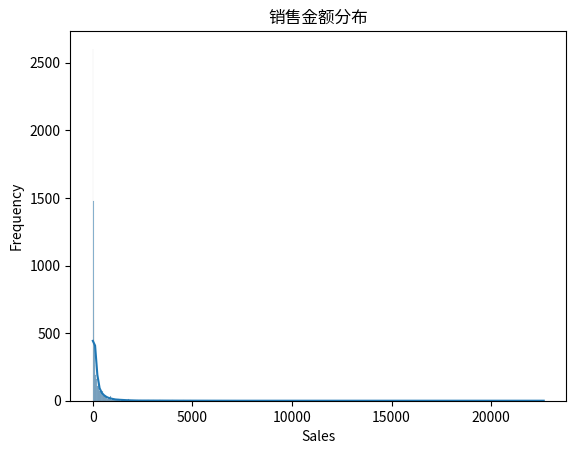

In [9]:
# Plotting the distribution of 'Sales'
sns.histplot(df['Sales'], kde=True)

# Adding titles and labels
plt.title('销售金额分布')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Display the plot
plt.show()

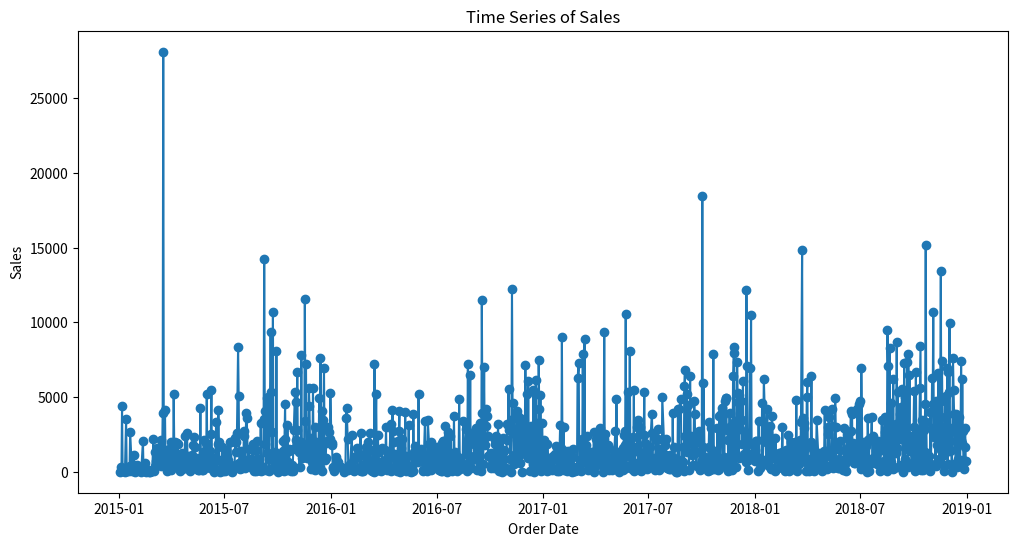

In [10]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Group by 'Order Date' and sum the sales
sales_over_time = df.groupby('Order Date')['Sales'].sum()

# Plotting the time series
plt.figure(figsize=(12,6))
plt.plot(sales_over_time, marker='o', linestyle='-')

# Adding titles and labels
plt.title('Time Series of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')

# Display the plot
plt.show()

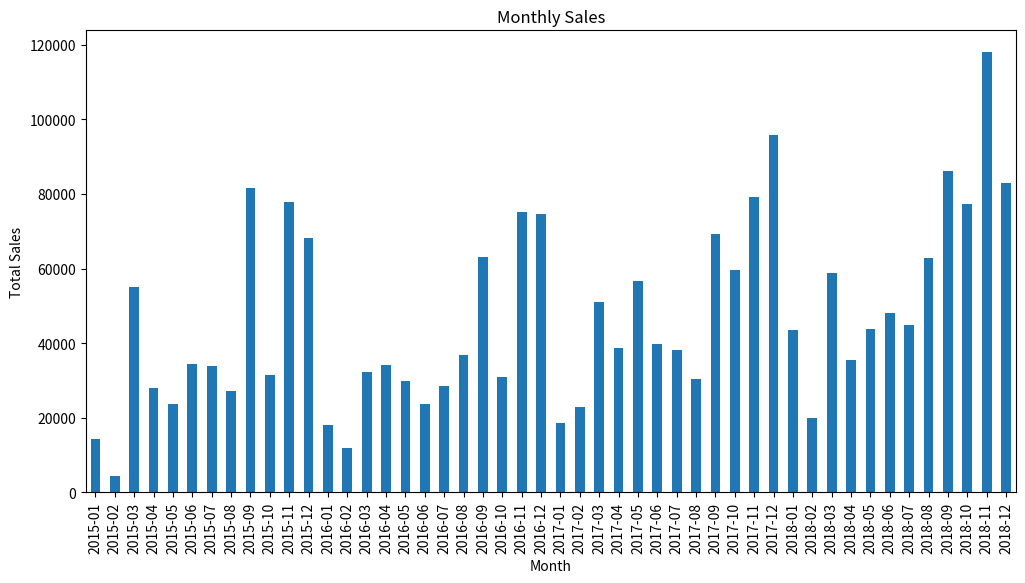

In [11]:
# Convert 'Order Date' to datetime if not already done
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extract the month and create a new column
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Group by 'Order Month' and sum the sales
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# Plotting the time series of monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')

# Adding titles and labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Display the plot
plt.show()


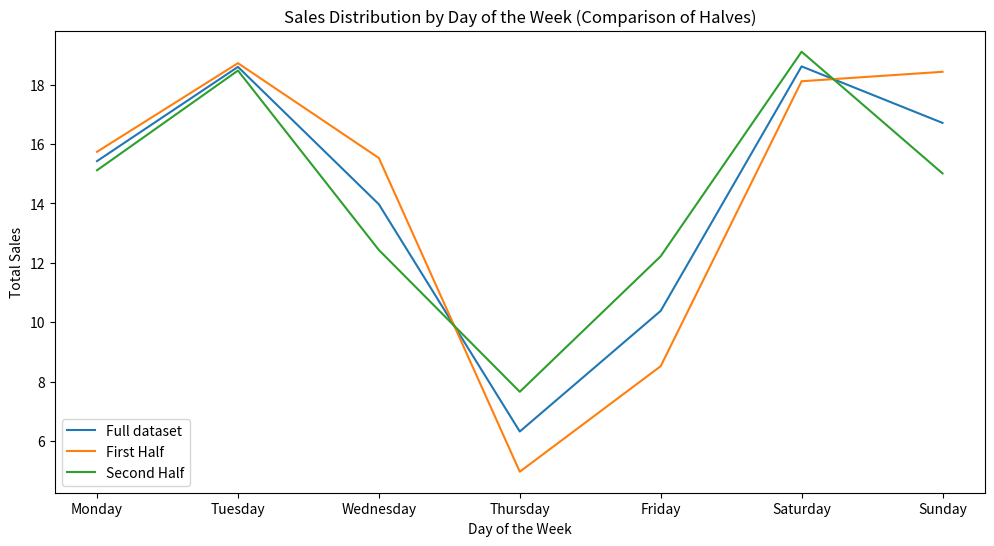

In [12]:
# Ensure 'Order Date' is a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Create a new column for the day of the week
df['Day of Week'] = df['Order Date'].dt.day_name()

# Use only the first half of the data
first_half_df = df.iloc[:len(df)//2]
second_half_df = df.iloc[len(df)//2:]

# Group by 'Day of Week' and sum the sales
weekly_sales = df.groupby('Day of Week')['Sales'].sum()
first_half_weekly_sales = first_half_df.groupby('Day of Week')['Sales'].sum()
second_half_weekly_sales = second_half_df.groupby('Day of Week')['Sales'].sum()

# Sort the days of the week in the correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)
first_half_weekly_sales = first_half_weekly_sales.reindex(ordered_days)
second_half_weekly_sales = second_half_weekly_sales.reindex(ordered_days)

total_sales = weekly_sales.sum()
total_sales_first_half = first_half_weekly_sales.sum()
total_sales_second_half = second_half_weekly_sales.sum()

# Calculate percentages
percentage_sales = weekly_sales / total_sales * 100
percentage_sales_first_half = first_half_weekly_sales / total_sales_first_half * 100
percentage_sales_second_half = second_half_weekly_sales / total_sales_second_half * 100

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(ordered_days, percentage_sales, label='Full dataset')
plt.plot(ordered_days, percentage_sales_first_half, label='First Half')
plt.plot(ordered_days, percentage_sales_second_half, label='Second Half')

# Adding titles and labels
plt.title('Sales Distribution by Day of the Week (Comparison of Halves)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend()

# Display the plot
plt.show()



9800 7
['Ship Mode', 'Segment', 'State', 'Category', 'Sub-Category', 'Order Month', 'Day of Week']
7 5 5 2


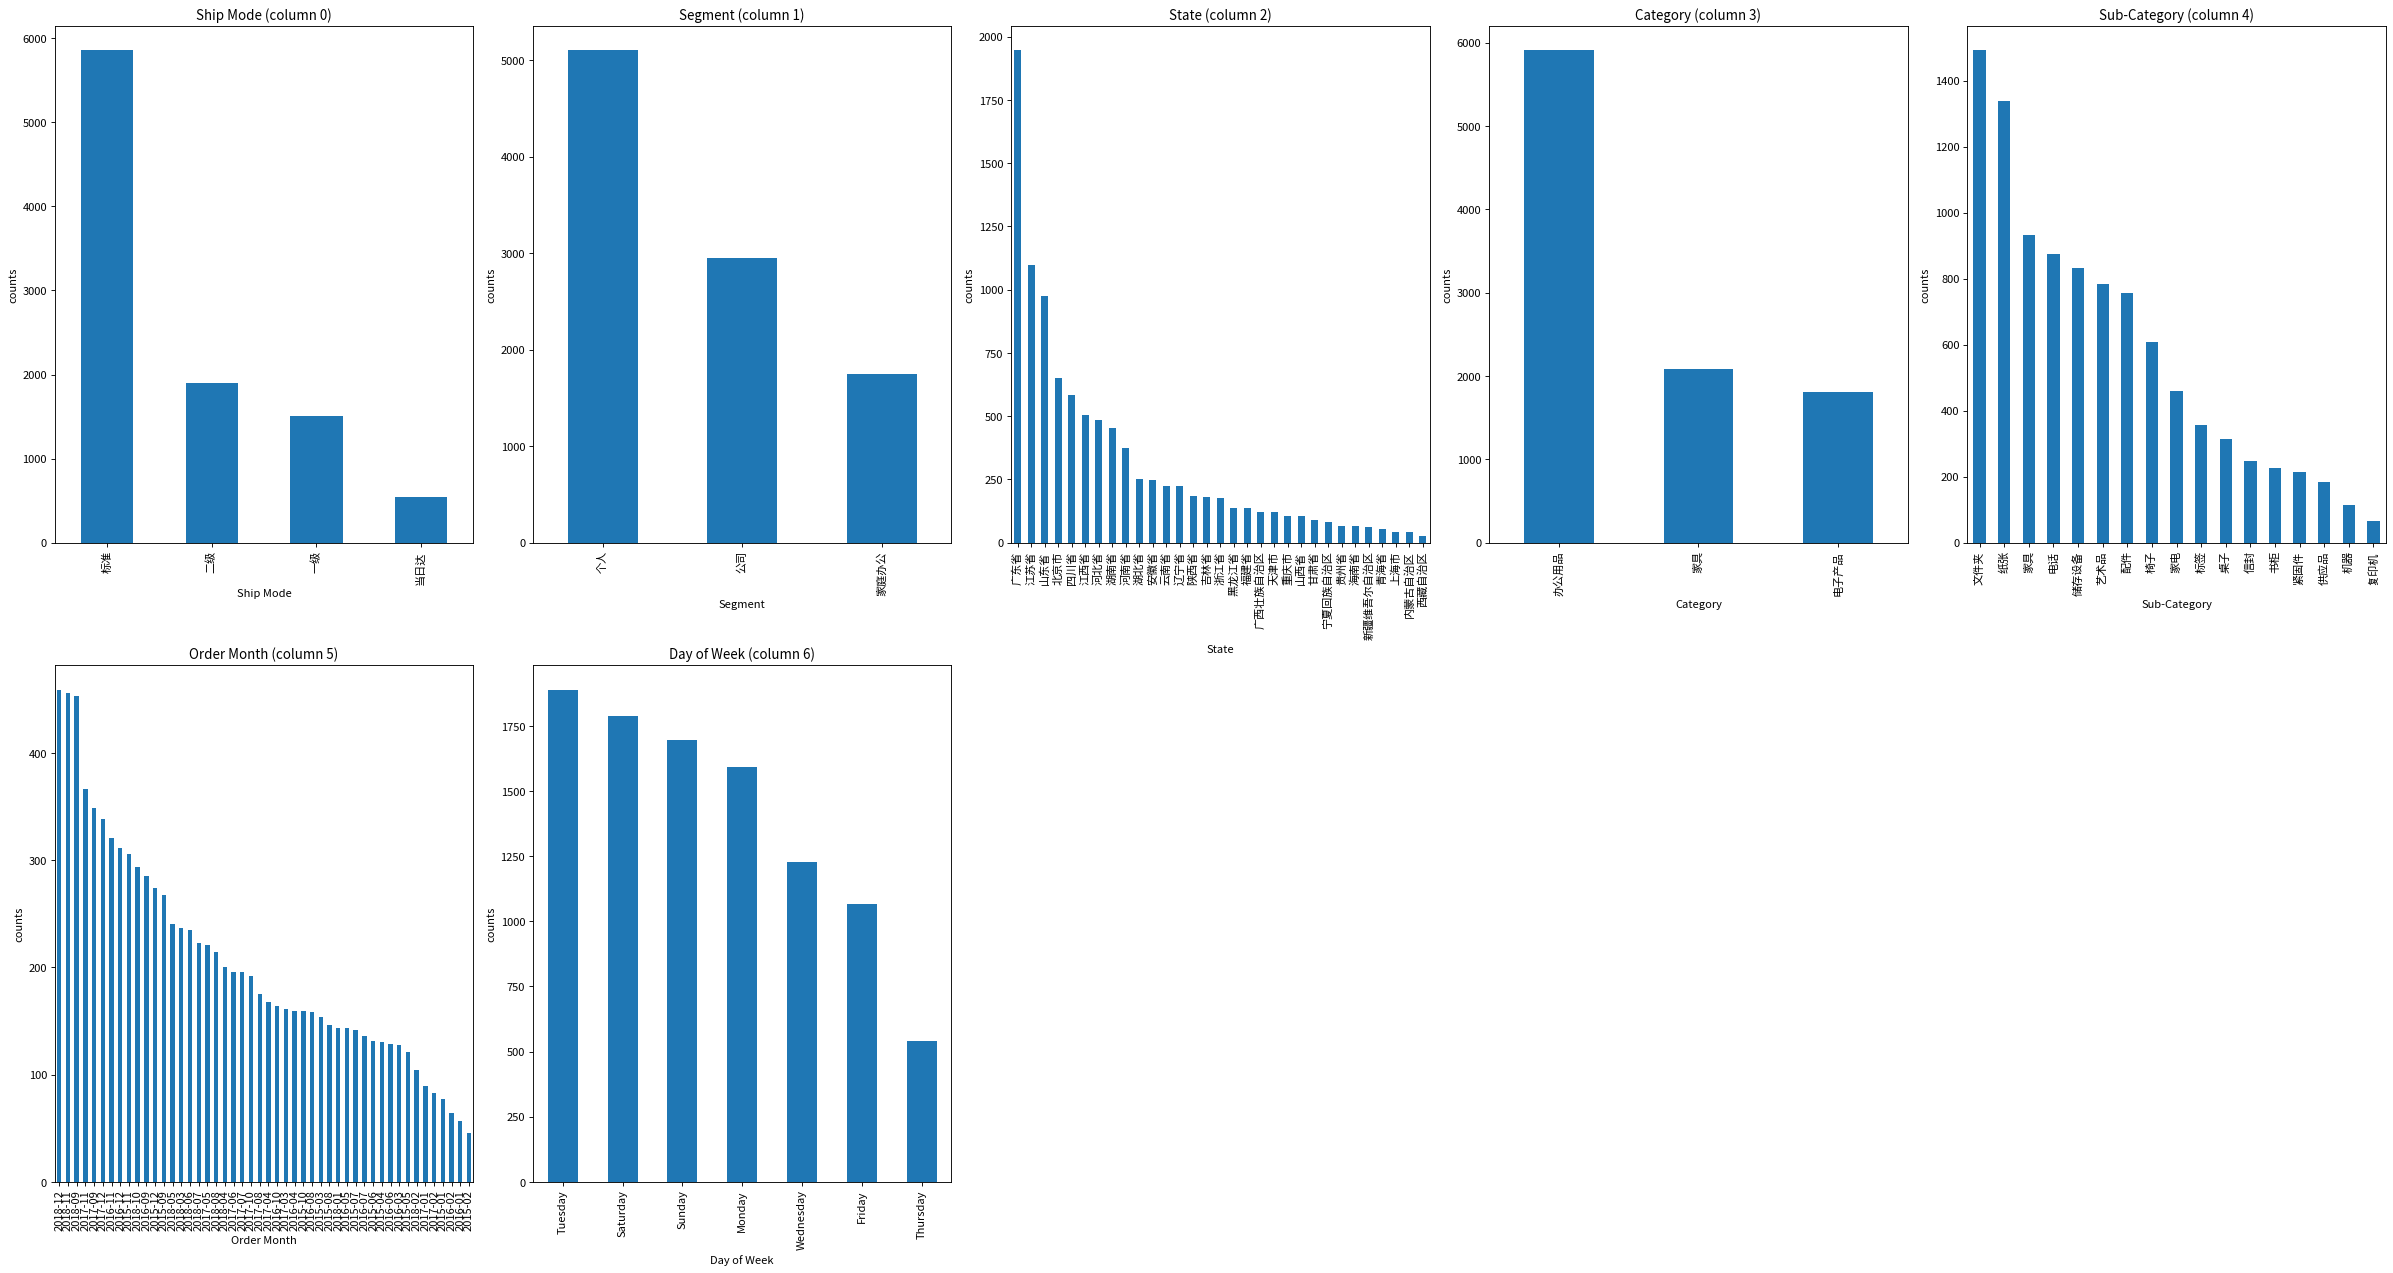

In [13]:
plotPerColumnDistribution(df, 10, 5)

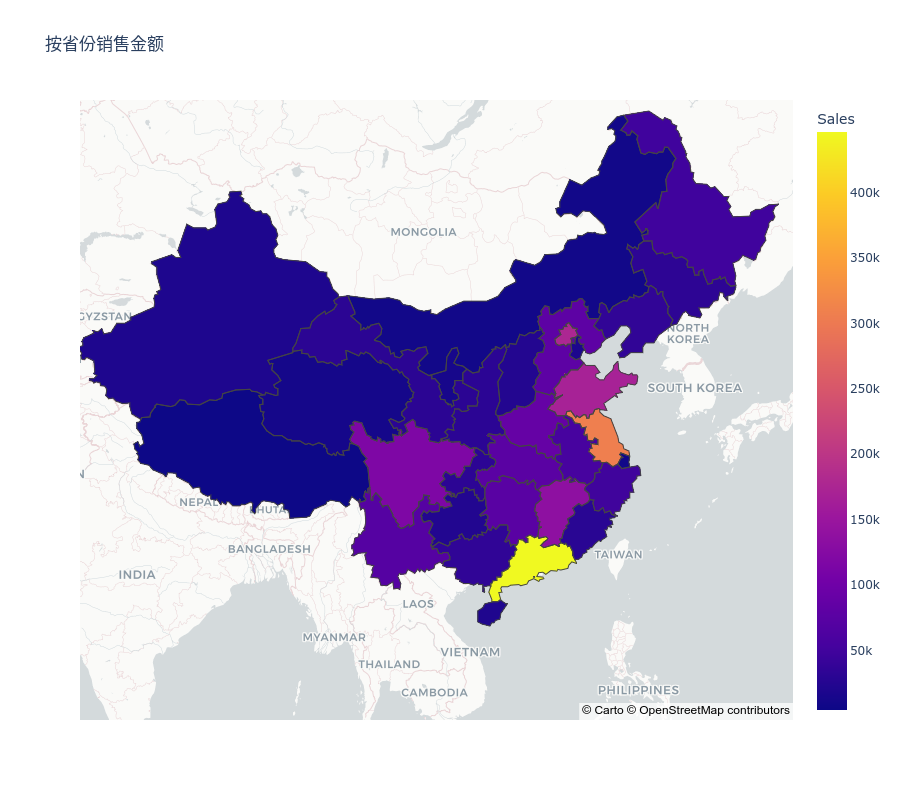

In [14]:
import json

with open("dataset/china.json", "r") as file:
    china_geojson = json.load(file)
    
import plotly.express as px

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

fig = px.choropleth_mapbox(
    sum_of_sales,                      # DataFrame with province data
    geojson=china_geojson,  # The GeoJSON file
    locations='State',   # Column in the DataFrame with province names
    color='Sales',          # Column in the DataFrame with values to color by
    featureidkey="properties.name", # Path in GeoJSON to match with `locations`
    mapbox_style="carto-positron",
    center={"lat": 35, "lon": 105},
    zoom=3,
    title="按省份销售金额"
)

fig.update_layout(
    width=900, 
    height=800
)

fig.show("png")


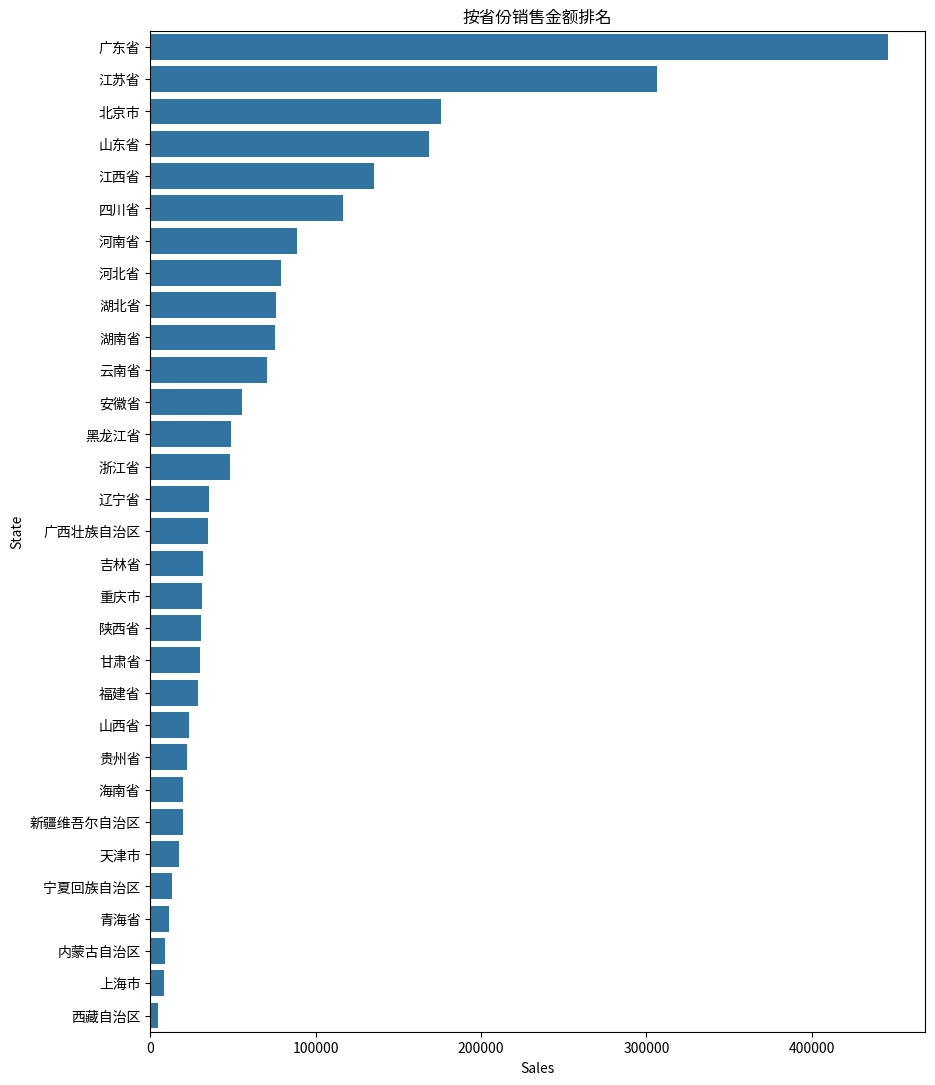

In [15]:
# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('按省份销售金额排名')
plt.show()

/tmp/ipykernel_433453/374425202.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_433453/374425202.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_433453/374425202.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



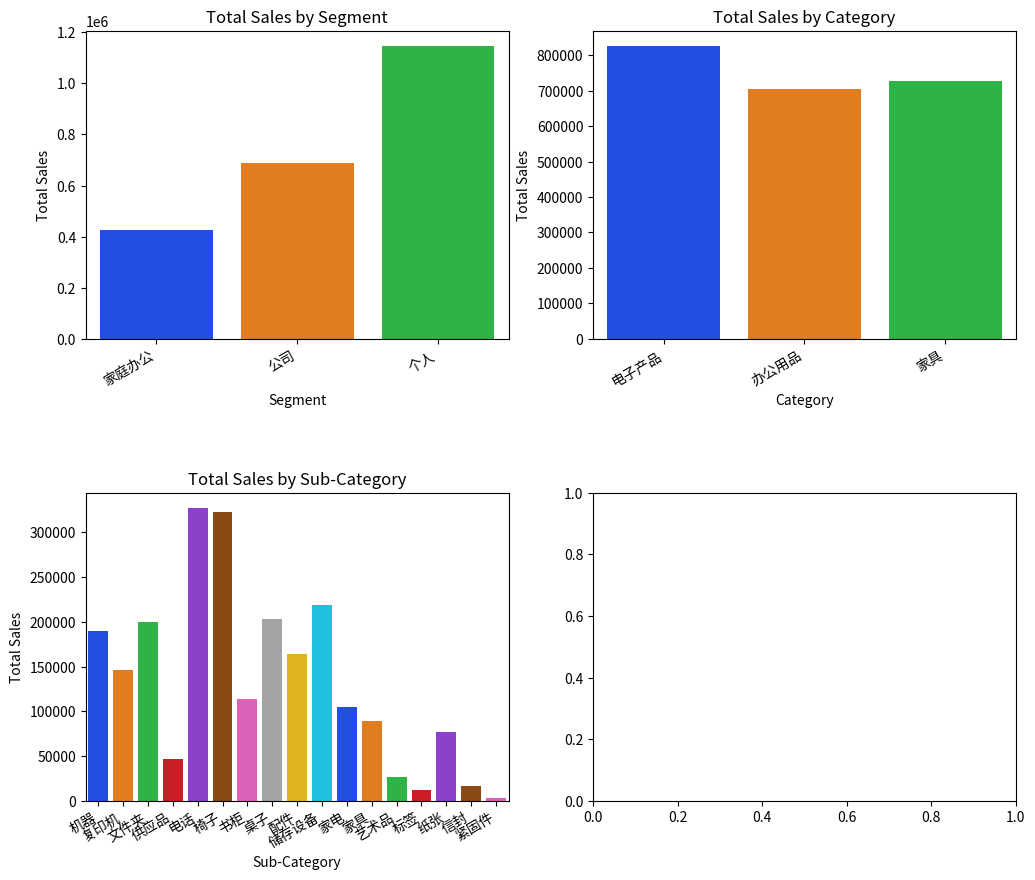

In [16]:
# Sort the DataFrame by 'Sales' in descending order
df = df.sort_values(by='Sales', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = ['Segment', 'Category', 'Sub-Category']

# Create barplots for each column
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=column, y='Sales', hue=column, data=df, estimator=np.sum, errorbar=None, legend=False, palette='bright', ax=ax)
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Total Sales by {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Display the plots
plt.show()

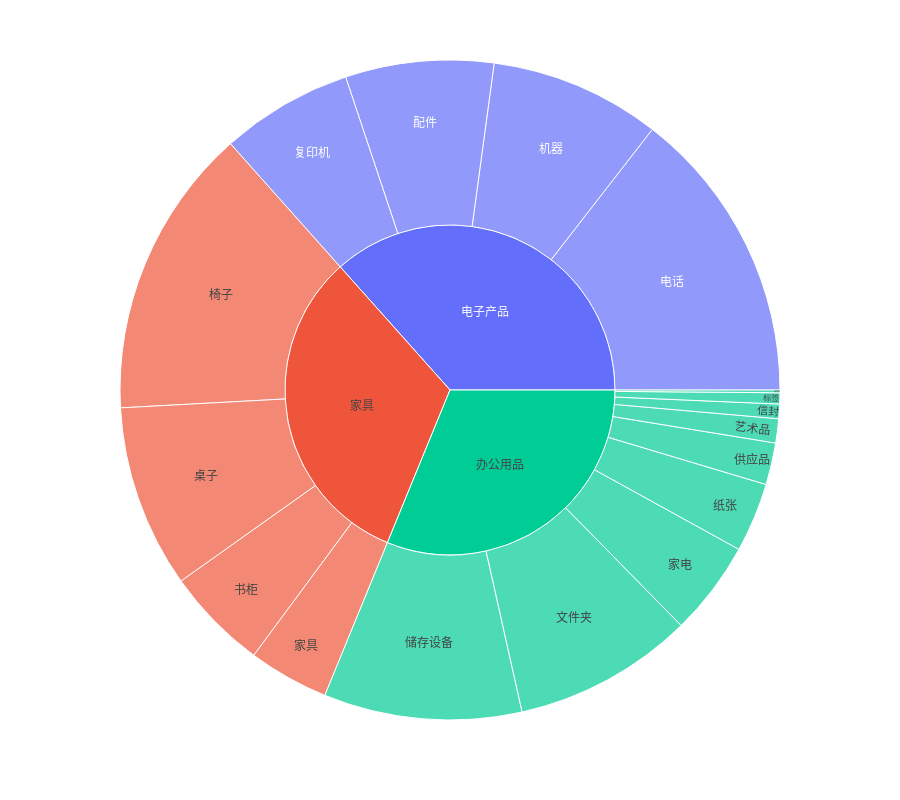

In [17]:
import plotly.express as px
# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
)

fig.update_layout(
    width=900, 
    height=800
)
fig.show("png")


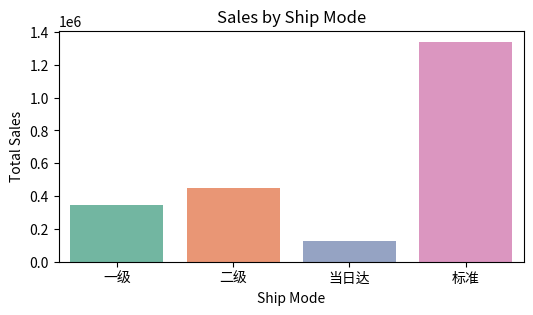

In [18]:
# Group by "Ship Mode" and calculate the sum of sales
sales_by_ship_mode = df.groupby("Ship Mode")["Sales"].sum().reset_index()

# Set a color palette
# Determine the number of unique values in "Ship Mode"
num_unique_ship_modes = sales_by_ship_mode["Ship Mode"].nunique()

# Set a color palette with the exact number of needed colors
colors = sns.color_palette("Set2", num_unique_ship_modes)

# Create a bar plot with different colors
plt.figure(figsize=(6, 3))
sns.barplot(x="Ship Mode", y="Sales", hue="Ship Mode", data=sales_by_ship_mode, legend=False, palette=colors)
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.title("Sales by Ship Mode")
plt.show()

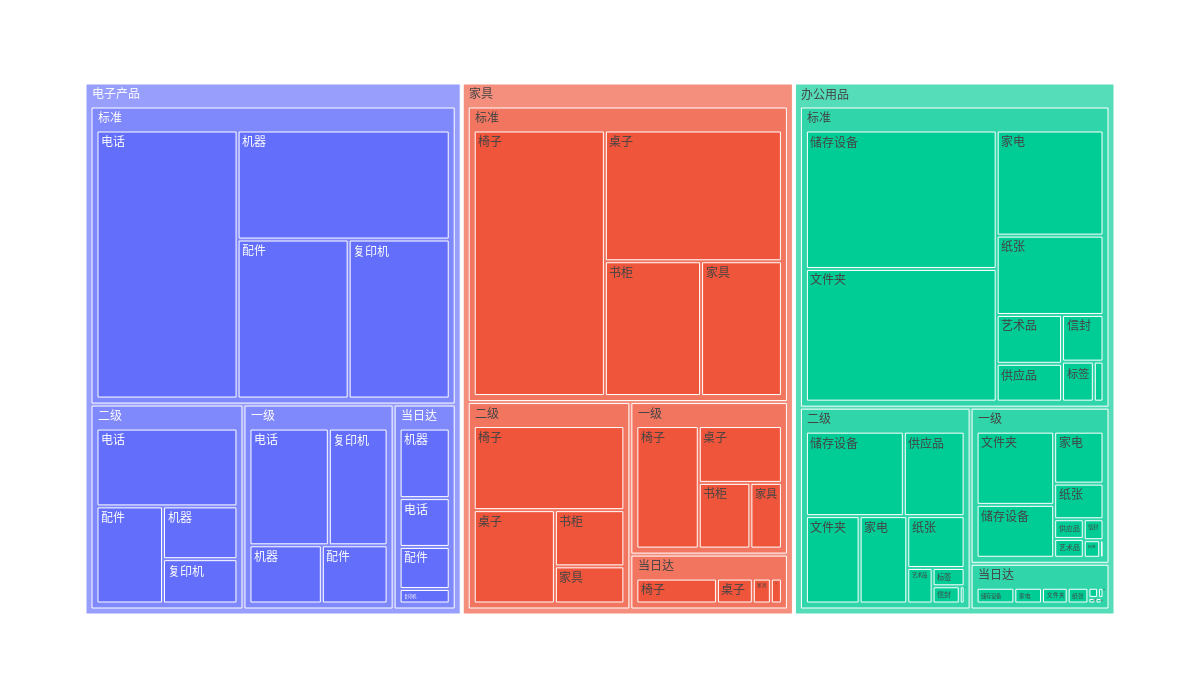

In [19]:
# Summarize the Sales data by Category, Ship Mode, and Sub-Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a treemap
fig = px.treemap(
    df_summary,
    path=['Category', 'Ship Mode', 'Sub-Category'],
    values='Sales',
)
fig.update_layout(font=dict(family="SimHei, Arial Unicode MS, sans-serif"))
fig.update_layout(
    width=1200, 
    height=700
)
fig.show("png")


In [20]:
import scipy.stats as stats

# Example: Calculating Eta-Squared for 'Category' and 'Sales'
categories = df['Category'].unique()
groups = [df.where(df['Category']==cat)['Sales'].dropna() for cat in categories]

f_value, p_value = stats.f_oneway(*groups)

# Calculating Eta-Squared
eta_sq = f_value / (f_value + (len(categories) - 1))

print(f"ANOVA F-value: {f_value}, P-value: {p_value}, Eta-squared: {eta_sq}")

ANOVA F-value: 262.1646591215712, P-value: 1.2178144965918443e-111, Eta-squared: 0.9924289645456337


In [21]:
import scipy.stats as stats

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Filter out columns with only one unique value
categorical_columns = [col for col in categorical_columns if df[col].nunique() > 1]
print(categorical_columns)


['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment', 'State', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Day of Week']


In [22]:

categorical_columns = ['Ship Mode', 'Segment', 'State', 'Category', 'Sub-Category', 'Product Name']
anova_results = {}

for col in categorical_columns:
    # Grouping the data
    grouped_data = df.groupby(col)['Sales']
    group_means = grouped_data.mean()
    group_sizes = grouped_data.count()

    # Weighted sum of squared deviations of group means from the overall mean
    SSB = sum(group_sizes * (group_means - df['Sales'].mean()) ** 2)

    # Total Sum of Squares (SST)
    SST = sum((df['Sales'] - df['Sales'].mean())**2)

    # Eta-squared
    eta_squared = SSB / SST

    if len(grouped_data) > 1:
        anova_result = stats.f_oneway(*[group.values for name, group in grouped_data])
        anova_results[col] = {'F-value': anova_result.statistic, 'P-value': anova_result.pvalue, 'Eta-squared': eta_squared}
    else:
        print(f"Not enough groups in {col} for ANOVA")

# Display the results
for col, result in anova_results.items():
    print(f"{col}:\nF-value: {result['F-value']}\nP-value: {result['P-value']}\nEta-squared: {result['Eta-squared']}\n")

Ship Mode:
F-value: 0.07437771541761823
P-value: 0.9737696598907598
Eta-squared: 2.2777466705292314e-05

Segment:
F-value: 0.5874032714436926
P-value: 0.5557881652680301
Eta-squared: 0.0001199005494475228

State:
F-value: 2.118766603046748
P-value: 0.0003452724697625626
Eta-squared: 0.0064645401309647915

Category:
F-value: 262.1646591215713
P-value: 1.2178144965918443e-111
Eta-squared: 0.050800560865388915

Sub-Category:
F-value: 152.33128403315487
P-value: 0.0
Eta-squared: 0.19944685776335644

Product Name:
F-value: 19.34157396765569
P-value: 0.0
Eta-squared: 0.8180308878775352



In [23]:
# For Ship Mode and Segment, the Eta-squared values are very small, indicating a small effect size. The P-values for these columns are also relatively high, suggesting that the differences in sales across these categories might not be statistically significant.

# State has a slightly higher Eta-squared value, and its low P-value indicates statistical significance.

# Category and Sub-Category have much higher Eta-squared values, suggesting a moderate to large effect size. The P-values are extremely small, showing strong evidence against the null hypothesis.

# Product Name has the highest Eta-squared, meaning it accounts for a significant proportion of the total variance in sales. The P-value is also extremely small, suggesting a statistically significant difference in sales across different products.

# The results provide insights into which categorical variables have the most substantial influence on sales. In this dataset, the "Product Name" seems to have the most significant impact, followed by "Sub-Category" and "Category".

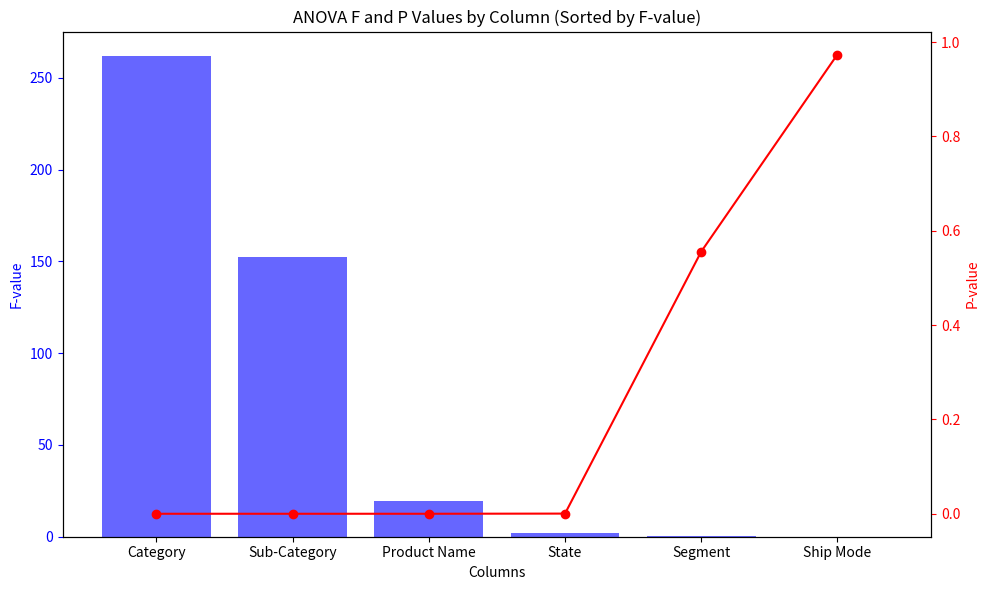

In [24]:
import matplotlib.pyplot as plt

# Assuming anova_results is a dictionary with columns as keys
# and each value is another dictionary with 'F-value' and 'P-value'

# Sort the columns by F-value in descending order
sorted_columns = sorted(anova_results, key=lambda x: anova_results[x]['F-value'], reverse=True)
sorted_f_values = [anova_results[col]['F-value'] for col in sorted_columns]
sorted_p_values = [anova_results[col]['P-value'] for col in sorted_columns]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for F-values
ax1.bar(sorted_columns, sorted_f_values, color='b', alpha=0.6, label='F-value')
ax1.set_xlabel('Columns')
ax1.set_ylabel('F-value', color='b')
ax1.tick_params('y', colors='b')

# Twin axis for P-values
ax2 = ax1.twinx()
ax2.plot(sorted_columns, sorted_p_values, color='r', marker='o', label='P-value')
ax2.set_ylabel('P-value', color='r')
ax2.tick_params('y', colors='r')

# Adding titles and layout adjustments
plt.title('ANOVA F and P Values by Column (Sorted by F-value)')
fig.tight_layout()

# Show the plot
plt.show()


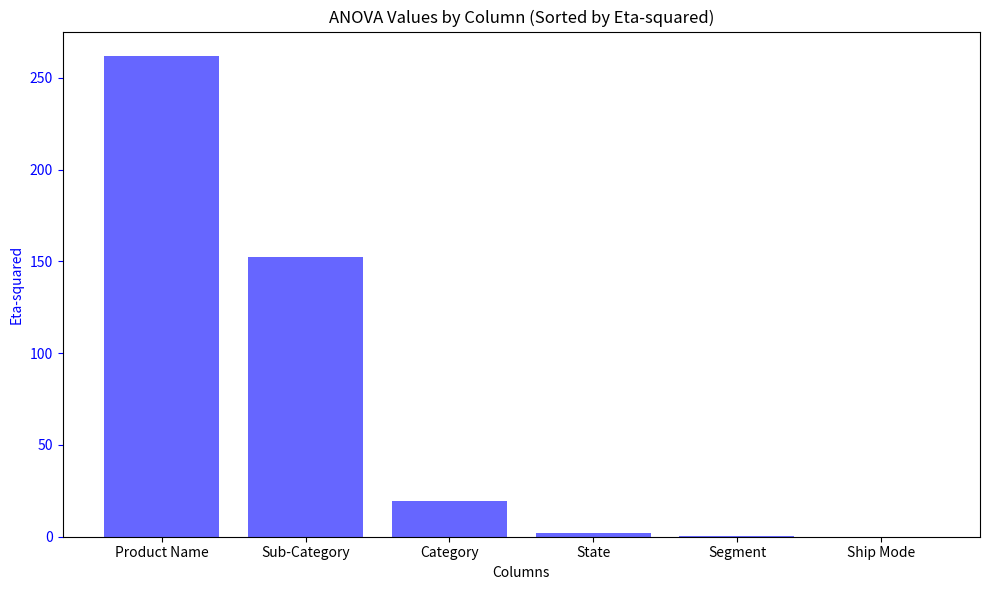

In [27]:

# Sort the columns by F-value in descending order
sorted_columns = sorted(anova_results, key=lambda x: anova_results[x]['Eta-squared'], reverse=True)
sorted_eta_values = [anova_results[col]['Eta-squared'] for col in sorted_columns]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for F-values
ax1.bar(sorted_columns, sorted_f_values, color='b', alpha=0.6, label='F-value')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Eta-squared', color='b')
ax1.tick_params('y', colors='b')

# Adding titles and layout adjustments
plt.title('ANOVA Values by Column (Sorted by Eta-squared)')
fig.tight_layout()

# Show the plot
plt.show()


In [28]:
from openpyxl import load_workbook
# Create a DataFrame
data = pd.DataFrame({
    'Column': sorted_columns,
    'F-value': sorted_f_values,
    'P-value': sorted_p_values
})
# Path to your Excel file
file_path = 'result.xlsx'

# Check if the file exists and is in .xlsx format
if os.path.exists(file_path) and file_path.endswith('.xlsx'):
    mode = 'a'  # Append if already exists
    if_sheet_exists = 'replace'  # Replace the sheet if it exists
else:
    mode = 'w'  # Create a new file if not exists
    if_sheet_exists = None  # Default behavior for new file

# Use ExcelWriter with the appropriate mode
with pd.ExcelWriter(file_path, engine='openpyxl', mode=mode, if_sheet_exists=if_sheet_exists) as writer:
    data.to_excel(writer, sheet_name='ANOVA', index=False)

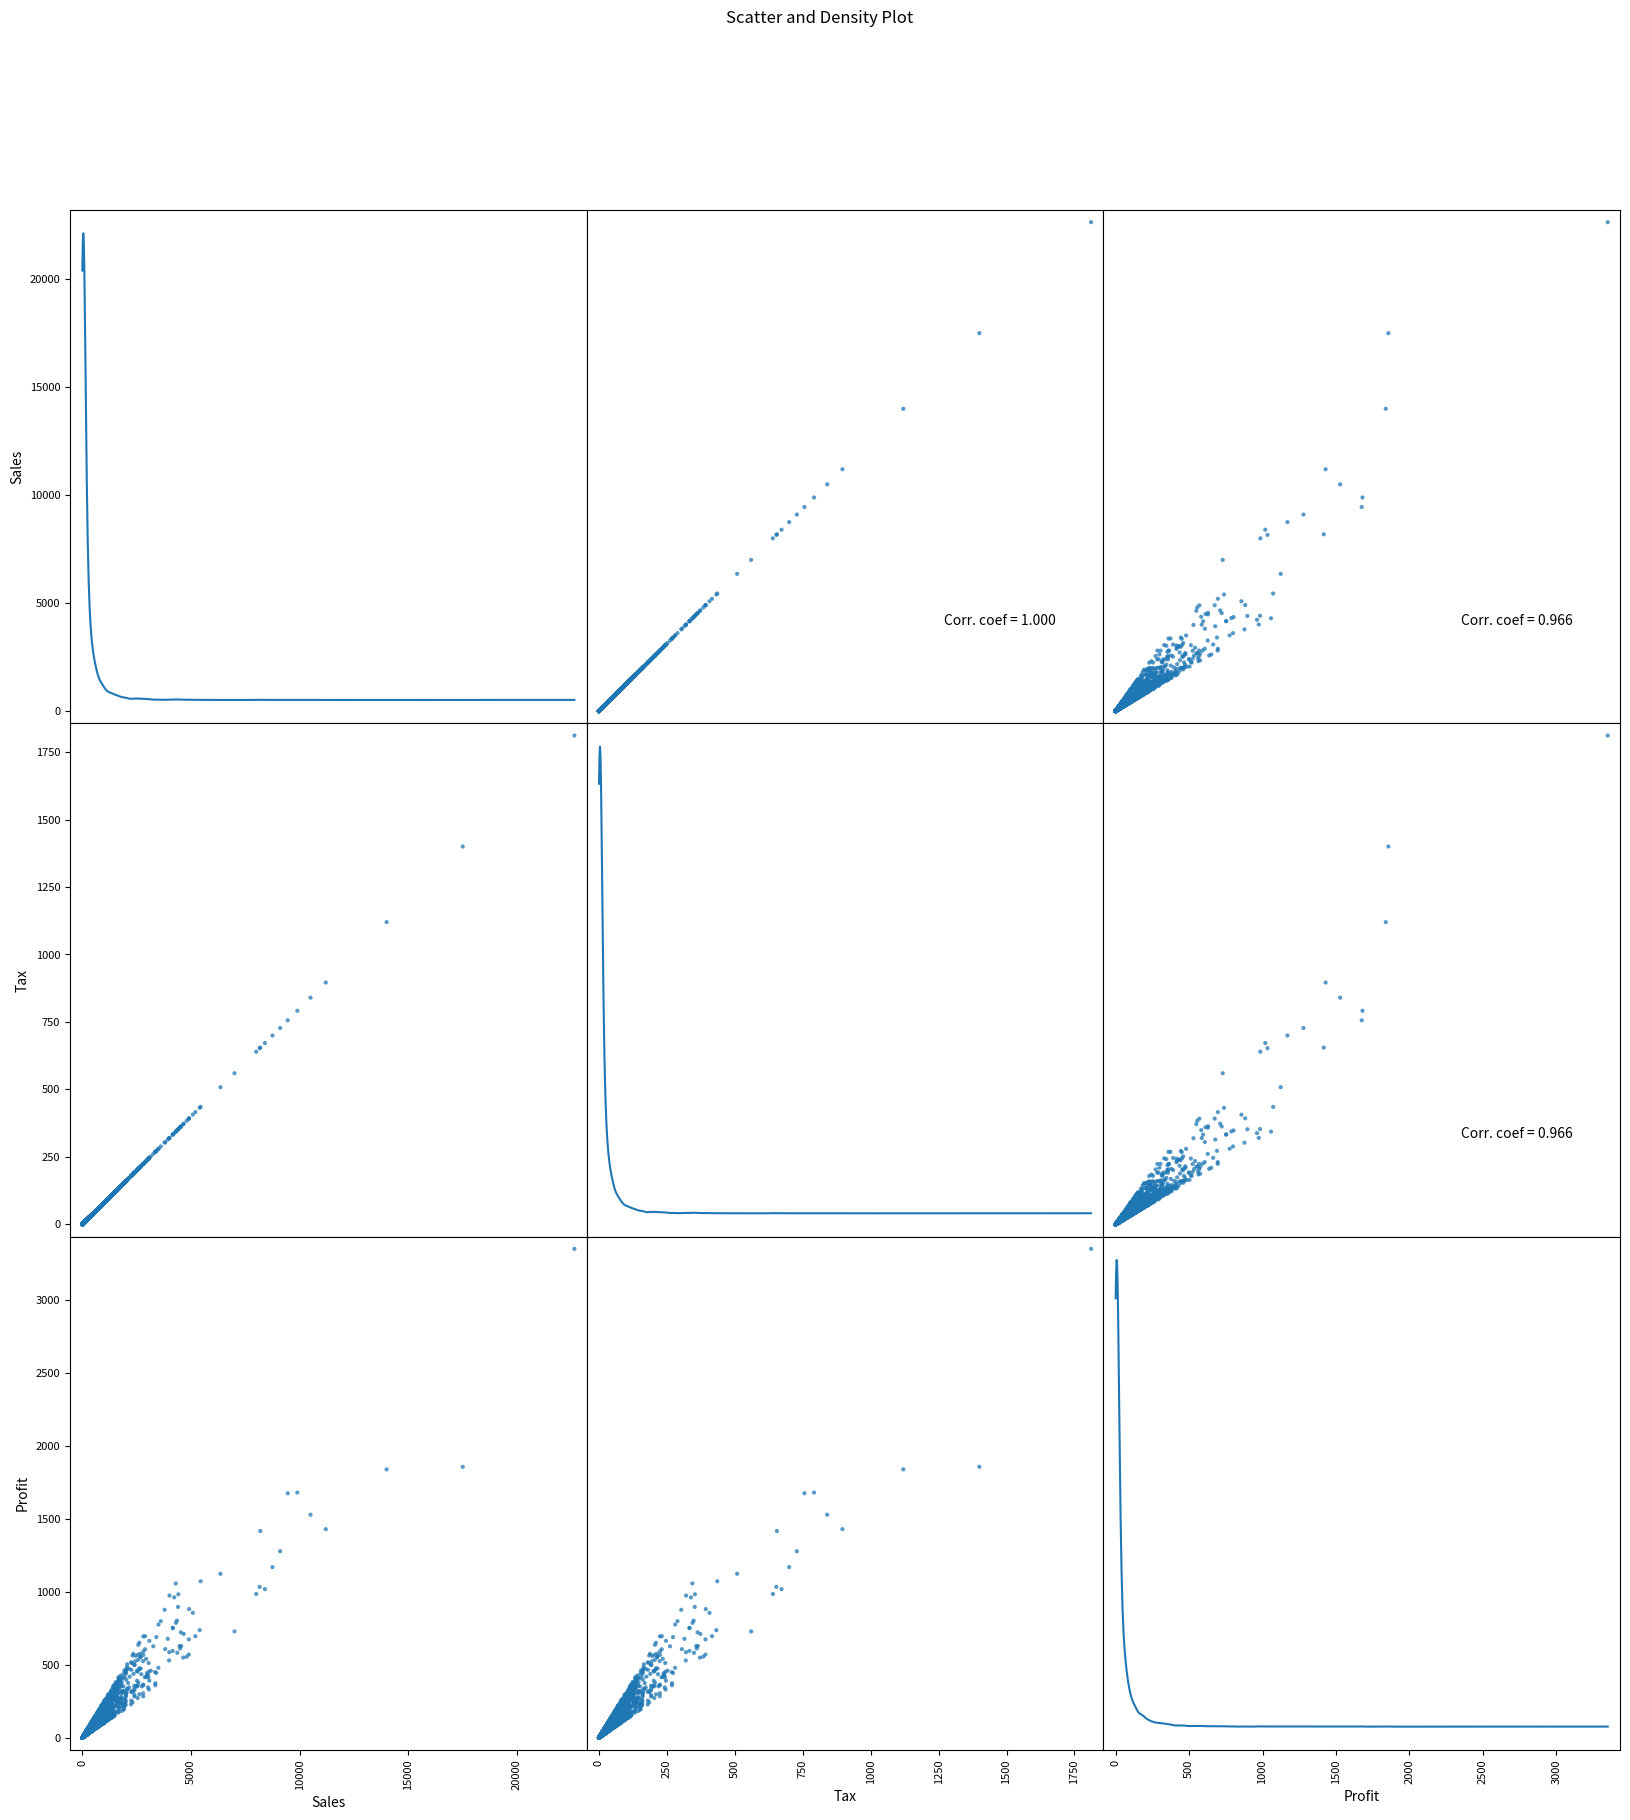

In [29]:
plotScatterMatrix(df.drop(columns=['Row ID']), 20, 10)